90

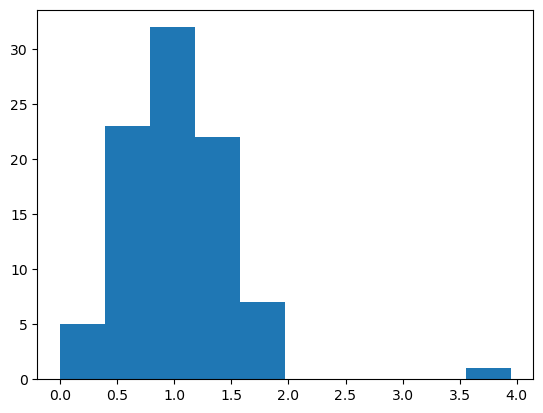

In [2]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
DIR='/lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/ULs/files/PSF_0.3/alfa=2.07/pseudo/'
EBL='Franceschini08'
# EBL='Gilmore12Fiducial'
file_1=f'UpperLimit_1_{EBL}.csv'
file_2=f'UpperLimit_2_{EBL}.csv'
import pandas as pd
import pandas as pd

import pandas as pd

import pandas as pd
import pandas as pd

def load_grb_data(file_path):
    """
    Carga un archivo CSV con formato:
    GRB, Model, Norm, Index, <8 valores numéricos separados por espacios>
    """
    # Leer las primeras 3 columnas separadas por coma
    df = pd.read_csv(file_path, header=None, names=["GRB", "Model", "Norm", "Rest"])

    data = []
    for _, row in df.iterrows():
        try:
            grb = row["GRB"]
            model = row["Model"]
            norm = float(row["Norm"])
            rest = row["Rest"]

            # Separar valores numéricos restantes
            nums = rest.strip().split()
            if len(nums) != 8:
                print(f"Advertencia: {grb} tiene {len(nums)} valores (esperado 8)")
                continue

            nums = list(map(float, nums))
            full_row = [grb, model, norm] + nums
            data.append(full_row)
        except Exception as e:
            print(f"Error procesando {row}: {e}")
            continue

    columns = [
        "GRB", "Model", "Norm", "Index", "TS", "sqrt(TS)",
        "Flux", "FluxMin", "FluxMax", "LowerBound", "UpperBound"
    ]
    return pd.DataFrame(data, columns=columns)

    """
    Carga un archivo .csv donde:
    - Columna 1: nombre del GRB
    - Columna 2: string con "Model,Norm,Index" seguido de valores numéricos separados por espacios
    """
    # Leer el archivo como dos columnas: GRB, Rest
    df = pd.read_csv(file_path, header=None, names=["GRB", "Rest"])

    data = []
    for _, row in df.iterrows():
        grb = row["GRB"]
        rest = row["Rest"]

        # Separar la parte antes de los espacios: "PowerLaw,1.0e-10,2.07"
        try:
            model_part, numeric_part = rest.split(' ', 1)
            model, norm, index = model_part.split(',')
            numbers = numeric_part.strip().split()

            # Asegurar que hay exactamente 8 números después
            if len(numbers) != 8:
                print(f"Advertencia: {grb} tiene {len(numbers)} valores numéricos (esperado 8)")
                continue

            # Construir fila
            full_row = [grb, model, float(norm), float(index)] + [float(n) for n in numbers]
            data.append(full_row)
        except Exception as e:
            print(f"Error procesando {grb}: {e}")
            continue

    # Crear DataFrame final
    columns = [
        "GRB", "Model", "Norm", "Index", "Duration", "TimeError",
        "Flux", "FluxMin", "FluxMax", "LowerBound", "UpperBound"
    ]
    return pd.DataFrame(data, columns=columns)

    """
    Lee un archivo CSV con GRB y modelo+datos como una cadena.
    Separa correctamente el modelo y convierte los números.
    """
    # Leer sin cabecera y con coma como separador
    df = pd.read_csv(file_path, names=["GRB", "Rest"], header=None)

    # Dividir la columna 'Rest' en modelo y 9 valores numéricos
    split_cols = df["Rest"].str.extract(r'(?P<Model>PowerLaw),(?P<Norm>[^,]+),(?P<Index>[^\s]+)\s+'
                                        r'(?P<Duration>[^\s]+)\s+(?P<TimeError>[^\s]+)\s+'
                                        r'(?P<Flux>[^\s]+)\s+(?P<FluxMin>[^\s]+)\s+(?P<FluxMax>[^\s]+)\s+'
                                        r'(?P<LowerBound>[^\s]+)\s+(?P<UpperBound>[^\s]+)')

    # Combinar con GRB
    result = pd.concat([df["GRB"], split_cols], axis=1)

    # Convertir columnas numéricas
    numeric_cols = result.columns.drop(["GRB", "Model"])
    result[numeric_cols] = result[numeric_cols].apply(pd.to_numeric, errors='coerce')

    return result

    # Leer como CSV con dos primeras columnas separadas por coma
    df = pd.read_csv(path, header=None, names=["GRB", "Model", "Data"], engine='python')

    # Separar el campo "Data" (que contiene los números) por espacios
    data_expanded = df["Data"].str.split(expand=True)

    # Combinar con las primeras dos columnas
    full_df = pd.concat([df[["GRB", "Model"]], data_expanded], axis=1)

    # Nombrar columnas si se sabe cuántas hay (aquí asumimos 9 numéricos)
    full_df.columns = [
        "GRB", "Model",
        "Norm", "Index", "Duration", "Time Error",
        "Flux", "Flux -", "Flux +", "Lower Bound", "Upper Bound"
    ]

    # Convertir columnas numéricas
    for col in full_df.columns[2:]:
        full_df[col] = pd.to_numeric(full_df[col], errors="coerce")

    return full_df

    """
    Carga datos de GRBs desde un archivo, ajustando automáticamente las columnas.
    """
    data = []
    with open(file_path, "r") as f:
        for i, line in enumerate(f, 1):
            parts = line.strip().split(",")
            if len(parts) < 3:
                continue
            name = parts[0].strip()
            model = parts[1].strip()
            rest = parts[2].strip().split()

            if len(rest) not in [9, 10, 11]:
                print(f"Línea {i} ignorada: {len(rest)} valores encontrados")
                continue

            row = [name, model] + rest
            data.append(row)

    # Ajusta dinámicamente el número de columnas
    max_len = max(len(row) for row in data)
    columns = ["GRB", "Model"] + [f"Col_{i}" for i in range(1, max_len - 1)]

    df = pd.DataFrame(data, columns=columns)

    # Intentar convertir numéricas
    for col in columns[2:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

    """
    Carga datos de GRBs desde un archivo y devuelve un DataFrame.
    Ignora las líneas que no tengan el formato correcto.
    """
    data = []
    
    with open(file_path, "r") as f:
        for i, line in enumerate(f, 1):
            parts = line.strip().split(",")
            if len(parts) < 3:
                print(f"Línea {i} ignorada: menos de 3 campos")
                continue

            name = parts[0].strip()
            model = parts[1].strip()
            rest = parts[2].strip().split()

            if len(rest) != 9:
                print(f"Línea {i} ignorada: {len(rest)} valores numéricos encontrados (esperado 9)")
                continue

            row = [name, model] + rest
            data.append(row)

    columns = [
        "GRB", "Model", "Norm", "Index", "Duration", "Time Error",
        "Flux", "Flux -", "Flux +", "Lower Bound", "Upper Bound"
    ]
    
    df = pd.DataFrame(data, columns=columns)

    # Convertir las columnas numéricas a float
    for col in columns[2:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df
def Lists(file1,file2,dir):
    UNO=pd.read_csv(dir+file1).to_list()
    DOS=pd.read_csv(dir+file2).to_list()
    return(UNO+DOS)
def get_config(name,label,delta):
    PATH_BASE = '/lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/'
    GRB_KN_DIR = PATH_BASE  
    GITLAB_DIR = '/lustre/hawcz01/scratch/userspace/jorgeamontes/GitLab_kn_paper/'
    config = {
        'BASE_DIR': PATH_BASE,
        'GRB_KN_DIR': GRB_KN_DIR,
        'PATH_BASE': PATH_BASE,
        'Delta':delta,
        'GITLAB_DIR': GITLAB_DIR,
        'GRBsINFO': PATH_BASE + 'data/ULs/config/GRB_List.csv',
        'bin_size': bin_size,
        'spectral_index': spectral_index,
        'PATH_GRBs_Healpix': PATH_BASE + f'data/healpix_maps_{spectral_index}_ER/',
        'PATH_GENERAL': PATH_BASE + f'data/ULs/config/Coordinates/PSF_{bin_size}/alfa={spectral_index}/{name}',
        'energy_ranges': PATH_BASE + f'config/Energy_ranges.csv',
        'GRBINFO_folder': PATH_BASE + 'data/ULs/config/',
        'OUTPUT_folder': PATH_BASE + f'data/ULs/files/PSF_{bin_size}/alfa={spectral_index}/{name}',
        'PATH_SH': PATH_BASE + f'data/ULs/codes/PSF_{bin_size}/alfa={spectral_index}/{name}',
        'RECALCULATED': PATH_BASE + 'data/corrected/',
        'File_1st_transit': PATH_BASE + f'data/ULs/config/Coordinates/PSF_{bin_size}/alfa={spectral_index}/{name}Coordinates_with_Max_Sig_1_0{bin_size}.csv',
        'File_2nd_transit': PATH_BASE + f'data/ULs/config/Coordinates/PSF_{bin_size}/alfa={spectral_index}/{name}Coordinates_with_Max_Sig_2_0{bin_size}.csv',
        'EBL_list': ['Franceschini08', 'Gilmore12Fiducial'],
        'LABEL_UL_CODE': 'ER',
        'LABELS': [f'1{label}', f'2{label}'],
        'PATH_LATEX': PATH_BASE + f'/data/ULs/Latex/{name}',
        'name':name,
        'FORCE_BINSIZE':False}    
    PATH_GRBs_Healpix = config['PATH_GRBs_Healpix']
    return(config)

bin_size = 0.3
spectral_index = 2.07
config=get_config('','',0)
dir=config['PATH_GENERAL']
list_dir=glob.glob(dir+'/_plus_*')


B=pd.DataFrame()
for transit in [1,2]:
    j=1
    name=f'Coordinates_with_Max_Sig_{transit}_0{bin_size}.csv'
    for i in list_dir: 
        A = pd.read_csv(i+'/'+name,header=0)
        A.rename(columns={'Significance':f'Significance{j}'},inplace=True)
        A['transit']=transit
        if len(B)>0:
            C=A[['Name',f'Significance{j}','transit']]
            # C['transit']=transit
            B = pd.merge(left=B,right=C,on=['Name','transit'],how='outer')

        else:
            B=A[['Name',f'Significance{j}','transit']]
        j+= 1
z_off=B.groupby(['Name','transit']).apply(np.mean).to_numpy()

plt.hist(z_off)
len(z_off)

In [3]:
A=load_grb_data(DIR+file_1);B=load_grb_data(DIR+file_2)
source_on=A['sqrt(TS)'].to_list()+B['sqrt(TS)'].to_list()
GRBLIST='/lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/ULs/config/GRB_List.csv'
GRB_LIST=pd.read_csv(GRBLIST)
threshold_z=11111
A=pd.merge(right=A,left=GRB_LIST[GRB_LIST['z+pseudo']<threshold_z],right_on='GRB',left_on='Name',how='outer')
B=pd.merge(right=B,left=GRB_LIST[GRB_LIST['z+pseudo']<threshold_z],right_on='GRB',left_on='Name',how='outer')
# source_on = A['sqrt(TS)'].dropna().to_list() + B['sqrt(TS)'].dropna().to_list()
source_on
source_on=[1.46, 1.6699999999999997, 1.899999999999999, 1.0999999999999999, -0.0, 0.8799999999999999, 1.9500000000000006, -0.0, -1.9960433641517563, 0.2635203806540854, 0.28000000000000014, 1.1681488976175187, 2.539999999999997, 0.30508574167777375, 1.7400000000000007, 1.1100000000000003, 0.9500000000000002, 1.6099999999999999, 0.11000000000000013, -0.0, 2.5899999999999967, -2.9161624719406802, 2.2200000000000015, 2.8500000000000014, -0.0, 0.2399999999999999, -0.0, 1.15, 0.8300000000000002, 1.7000000000000004, 0.2399999999999999, 0.7499999999999999, -0.0, 0.8099999999999999, 0.10000000000000002, 0.44000000000000017, 2.0999999999999996, 0.8238972525805075, 1.0099999999999996, 0.009999999999999985, 1.8900000000000006, -0.0, -2.325829782517281, 1.2499999999999993, 0.7587227437547921, 0.11965258402722548, 1.2200000000000002, 1.4441591260998916, 1.68, 2.3296689609962637, -0.0, 0.9500000000000002, 2.02, 2.1900000000000017, 0.49, 2.7599999999999985, 1.7700000000000005, 1.31, -0.0, 0.983843138577162, 3.4100000000000428, 0.017114315434126653, -0.0, 1.959999999999999, 2.1100000000000003, 0.08000000000000017, 1.2000000000000004, -0.0, 1.2899999999999996, 2.479999999999997, 2.4700000000000015, 1.910000000000001, 0.7699999999999998, 1.2599999999999998, -0.0, 1.24]


Error procesando GRB               GRB150101641                    PowerLaw
Model                                                  0.0
Norm     2.07      2.15      1.46  2.23e-10  -1.68e-10 ...
Rest                                                   NaN
Name: 0, dtype: object: could not convert string to float: '2.07      2.15      1.46  2.23e-10  -1.68e-10  +1.68e-10    5.51e-11    3.91e-10'
Error procesando GRB               GRB150110923                    PowerLaw
Model                                                  0.0
Norm     2.07      3.26      1.80  6.83e-12  -6.59e-12 ...
Rest                                                   NaN
Name: 1, dtype: object: could not convert string to float: '2.07      3.26      1.80  6.83e-12  -6.59e-12  +6.59e-12    2.46e-13    1.34e-11'
Error procesando GRB               GRB150120123                    PowerLaw
Model                                                  0.0
Norm     2.07      3.61      1.90  7.41e-09  -3.93e-09 ...
Rest            

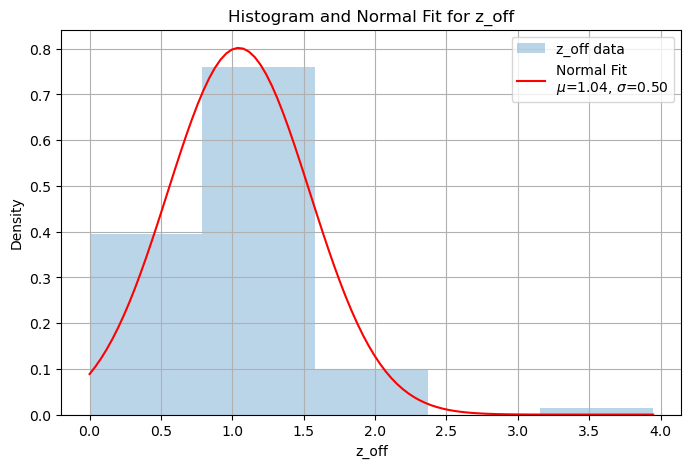

Fitted parameters: mu=1.0446, std=0.4977


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm,chi2
from scipy.optimize import curve_fit
mu, std = norm.fit(z_off)
x = np.linspace(min(z_off), max(z_off), 100)
plt.figure(figsize=(8, 5))
plt.hist(z_off, bins=5, density=True, alpha=0.3, label='z_off data')
plt.plot(x, norm.pdf(x, mu, std), 'r-', label=f'Normal Fit\n$\mu$={mu:.2f}, $\sigma$={std:.2f}')
plt.xlabel('z_off')
plt.ylabel('Density')
plt.title('Histogram and Normal Fit for z_off')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Fitted parameters: mu={mu:.4f}, std={std:.4f}")


In [10]:
# source_on=[0.27652459081559916, 1.1802728757073235, -1.119599012783303, -1.9960433641517563, 0.40100275333575064, -2.9161624719406802, 1.6099999999999999, 2.3100000000000014, 0.65, -0.0, 0.5799999999999998, 1.5800000000000007, -0.0, 2.549999999999998, 2.2200000000000015, 0.66, 2.7200000000000046, 1.0499999999999998, 1.0499999999999998, 1.4399999999999997, 2.0599999999999996, 0.2700000000000002, 1.0599999999999998, 0.38000000000000006, 0.8999999999999999, 1.9300000000000006, -0.0, 0.52, 1.7499999999999996, 1.0999999999999999, 0.059999999999999984, 2.8700000000000054, 0.2700000000000002, -0.0, 1.0099999999999996, 0.8300000000000002, 1.6000000000000003, 0.2700000000000002, 0.7100000000000001, -0.0, 0.84, 0.36999999999999994, 0.09333357287547434, 1.4797347826972556, 0.9848906128231127, 0.5058460775322822, 1.1032209558140882, 0.615972362625652, 2.3420162866669525, 0.983843138577162, -0.011783580173950953, 1.8499999999999994, 0.6000000000000001, 1.0, 0.2700000000000002, 2.8999999999999986, 0.98, -0.0, 2.21, 0.7799999999999999, 1.12, 2.1900000000000017, 2.9700000000000033, 0.7400000000000003, 2.0599999999999996, 1.0200000000000002, 1.92, 1.2200000000000002, 1.2300000000000006, 0.9200000000000002, -0.0, 0.9300000000000003, 2.02, 2.1799999999999997, 1.7700000000000005, 3.4499999999999553, -0.0, 2.200000000000001, 1.2200000000000002, -0.0, 1.2499999999999993, 1.2599999999999998, 2.479999999999997, 2.5099999999999976, 1.9500000000000006, 0.55, 1.2200000000000002, -0.0, 1.3000000000000003, 1.3400000000000007]
#source_on=[0.3910725874725802, 0.11894585127704338, 0.868557661767211, 0.9770353985581938, 0.3442090483901715, 0.998228170429232, 0.05369892814811972, 0.010444077061951051, 0.2578461108058647, 0.5, 0.2809573088985644, 0.057053433237754136, 0.5, 0.005386145954066723, 0.013209383807256225, 0.25462691467133614, 0.003264095815891266, 0.1468590563758959, 0.1468590563758959, 0.07493369953432705, 0.019699270409376912, 0.3935801268019604, 0.1445722996639096, 0.3519727075758372, 0.18406012534675953, 0.026803418877054952, 0.5, 0.3015317875469662, 0.040059156863817114, 0.13566606094638267, 0.47607781734589316, 0.002052358994939718, 0.3935801268019604, 0.5, 0.15624764502125466, 0.20326939182806836, 0.054799291699557995, 0.3935801268019604, 0.2388520680899867, 0.5, 0.20045419326044966, 0.3556912451994533, 0.46281928059188715, 0.06947201963077287, 0.16233890242120075, 0.3064823543994424, 0.13496561151927322, 0.2689563802727867, 0.009589938968063705, 0.16259632254101886, 0.5047008595577487, 0.03215677479561374, 0.27425311775007355, 0.15865525393145707, 0.3935801268019604, 0.001865813300384045, 0.1635430593276923, 0.5, 0.013552581146419995, 0.21769543758573318, 0.1313568810427307, 0.014262118410668823, 0.0014889987452374465, 0.2296499971647905, 0.019699270409376912, 0.15386423037273478, 0.027428949703836802, 0.11123243744783462, 0.10934855242569186, 0.17878637961437172, 0.5, 0.17618554224525784, 0.02169169376764679, 0.014628730775989252, 0.03836357036287119, 0.0002802932768162236, 0.5, 0.01390344751349859, 0.11123243744783462, 0.5, 0.10564977366685535, 0.10383468112130045, 0.006569119135546808, 0.006036558080412702, 0.025588059521638562, 0.29115968678834636, 0.11123243744783462, 0.5, 0.0968004845856103, 0.09012267246445238]
# source_on=Lists(file_1,file_2,DIR)
z_on = np.array(source_on)

p_values_on=norm.pdf(z_on, loc=mu, scale=std)
def fisher_stat(pvals):
    chi2_val = -2 * np.sum(np.log(pvals))
    p_comb = chi2.sf(chi2_val, 2 * len(pvals))
    sigma = norm.isf(p_comb)
    critical=chi2.isf(0.95, 2*76)
    return chi2_val,critical, p_comb, sigma
fisher_stat(p_values_on)


(414.53056110602364,
 124.5021856152117,
 3.341776776124244e-26,
 10.524187538491438)

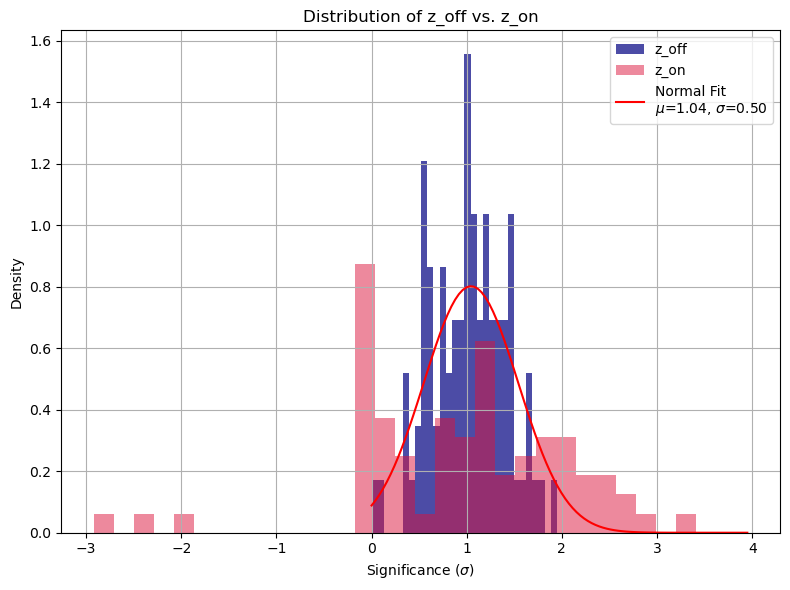

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(z_off[z_off<3.7], density=True, bins=30, alpha=0.7, color='navy', label='z_off')
plt.hist(z_on,  density=True, bins=30, alpha=0.5, color='crimson', label='z_on')
mu, std = norm.fit(z_off)
x = np.linspace(min(z_off), max(z_off), 100)
# plt.hist(z_off, bins=5, density=True, alpha=0.3, label='z_off data')
plt.plot(x, norm.pdf(x, mu, std), 'r-', label=f'Normal Fit\n$\mu$={mu:.2f}, $\sigma$={std:.2f}')
plt.xlabel('Significance ($\\sigma$)')
plt.ylabel('Density')
plt.title('Distribution of z_off vs. z_on')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
len(p_values_on)

76

In [8]:

z_off

array([0.96714286, 1.32      , 0.73142857, 1.54714286, 1.35571429,
       0.63571429, 1.46      , 1.05714286, 0.98142857, 0.99428571,
       0.88142857, 1.23285714, 0.95142857, 0.57285714, 0.60857143,
       0.92142857, 0.64428571, 0.        , 1.66857143, 1.06857143,
       0.47      , 0.99142857, 1.03142857, 1.16285714, 1.20857143,
       1.68142857, 0.75714286, 1.05142857, 0.54285714, 0.58285714,
       1.04285714, 0.81428571, 0.69      , 0.89428571, 1.61285714,
       1.48142857, 1.40857143, 1.01857143, 1.13285714, 0.34857143,
       0.57142857, 1.02428571, 0.63142857, 1.37428571, 1.11      ,
       1.23571429, 1.42857143, 1.01714286, 1.36      , 1.17      ,
       0.72285714, 0.56142857, 1.79857143, 1.17142857, 0.80857143,
       1.12857143, 1.18142857, 0.78571429, 3.94833333, 1.00142857,
       0.3825    , 0.54666667, 1.29      , 0.51857143, 1.44714286,
       1.19428571, 0.74428571, 1.46      , 1.36285714, 0.59      ,
       0.54142857, 0.115     , 1.95      , 0.76142857, 1.25142

In [9]:
B.groupby('Name').apply(np.mean)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
B[B['Name']=='GRB191031891']

,Name,Significance1_x,transit,Significance2_x,Significance3_x,Significance4_x,Significance5_x,Significance6_x,Significance7_x,Significance1_y,Significance2_y,Significance3_y,Significance4_y,Significance5_y,Significance6_y,Significance7_y
72,GRB191031891,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4.24,3.93,NaN,3.46,2.66,4.86,4.54
